In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas.plotting import table
from pprint import pprint
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dass_modeling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39737 entries, 0 to 39736
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1A             39737 non-null  int64 
 1   Q2A             39737 non-null  int64 
 2   Q3A             39737 non-null  int64 
 3   Q4A             39737 non-null  int64 
 4   Q5A             39737 non-null  int64 
 5   Q6A             39737 non-null  int64 
 6   Q7A             39737 non-null  int64 
 7   Q8A             39737 non-null  int64 
 8   Q9A             39737 non-null  int64 
 9   Q10A            39737 non-null  int64 
 10  Q11A            39737 non-null  int64 
 11  Q12A            39737 non-null  int64 
 12  Q13A            39737 non-null  int64 
 13  Q14A            39737 non-null  int64 
 14  Q15A            39737 non-null  int64 
 15  Q16A            39737 non-null  int64 
 16  Q17A            39737 non-null  int64 
 17  Q18A            39737 non-null  int64 
 18  Q19A  

Trying to see if there is correlation between depression score/cat (0-4) and married column. married2 will be 0 if never married and 1 if currently married or have been married.

In [4]:
df['married2'] = df.apply(lambda x: 0 if x['married'] == 1 else (1 if x['married'] == 2 \
                                 else (1 if x['married'] == 3 else np.nan)), axis=1)

In [5]:
df['married2'].value_counts()

0.0    34100
1.0     5442
Name: married2, dtype: int64

In [6]:
df['married'].value_counts()

1    34100
2     4351
3     1091
0      195
Name: married, dtype: int64

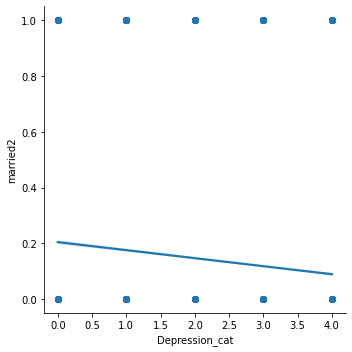

In [7]:
sns.lmplot(x='Depression_cat', y='married2', data=df)

In [8]:
df.corr(method ='pearson')

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,voted,married,familysize,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat,married2
Q1A,1.000000,0.314171,0.471136,0.383102,0.463046,0.561322,0.384748,0.476673,0.472164,0.447975,...,0.098826,-0.109667,0.008663,0.587625,0.563815,0.590596,0.565625,0.766179,0.740468,-0.117297
Q2A,0.314171,1.000000,0.280508,0.368479,0.283581,0.280591,0.372999,0.304525,0.326225,0.271515,...,0.077951,-0.069056,0.040805,0.355606,0.333154,0.570016,0.514302,0.420977,0.402581,-0.080963
Q3A,0.471136,0.280508,1.000000,0.360998,0.581835,0.397463,0.352548,0.494713,0.379803,0.634085,...,0.061151,-0.056708,-0.037506,0.793110,0.740566,0.530533,0.484707,0.599861,0.577616,-0.072003
Q4A,0.383102,0.368479,0.360998,1.000000,0.358360,0.367125,0.547623,0.432724,0.424300,0.338984,...,0.091732,-0.073452,-0.009645,0.442579,0.412489,0.726421,0.637076,0.541261,0.522895,-0.086667
Q5A,0.463046,0.283581,0.581835,0.358360,1.000000,0.393731,0.362890,0.496732,0.395931,0.593044,...,0.056357,-0.056649,-0.067611,0.767292,0.728264,0.539059,0.504003,0.610388,0.586773,-0.074384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Anxiety,0.590596,0.570016,0.530533,0.726421,0.539059,0.557574,0.744171,0.613911,0.702928,0.515482,...,0.146010,-0.152504,0.003518,0.669639,0.631216,1.000000,0.911065,0.802358,0.772757,-0.171978
Anxiety_cat,0.565625,0.514302,0.484707,0.637076,0.504003,0.528607,0.648944,0.573961,0.693472,0.484818,...,0.137938,-0.156349,0.004456,0.632654,0.626045,0.911065,1.000000,0.755857,0.739283,-0.176215
Stress,0.766179,0.420977,0.599861,0.541261,0.610388,0.726991,0.545298,0.729582,0.626597,0.564974,...,0.104383,-0.096064,-0.029574,0.739880,0.704698,0.802358,0.755857,1.000000,0.962738,-0.108662
Stress_cat,0.740468,0.402581,0.577616,0.522895,0.586773,0.701416,0.525307,0.702712,0.599894,0.545150,...,0.097179,-0.087976,-0.027556,0.712125,0.687169,0.772757,0.739283,0.962738,1.000000,-0.100034


In [9]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,married,familysize,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat,married2
0,4,4,2,4,4,4,4,4,2,1,...,1,2,No Degree,27,3,34,4,40,4,0.0
1,4,1,2,3,4,4,3,4,3,2,...,1,4,No Degree,24,3,17,3,27,3,0.0
2,3,1,4,1,4,3,1,3,2,4,...,1,3,No Degree,39,4,12,2,17,1,0.0
3,2,3,2,1,3,3,4,2,3,3,...,1,5,Biology,16,2,17,3,16,1,0.0
4,2,2,3,4,4,2,4,4,4,3,...,1,4,Psychology,32,4,40,4,29,3,0.0


In [10]:
df['Depression_cat'].corr(df['married2'])

-0.13006675377072896

In [11]:
df['Depression_cat'].corr(df['age'])

-0.050992134351928065

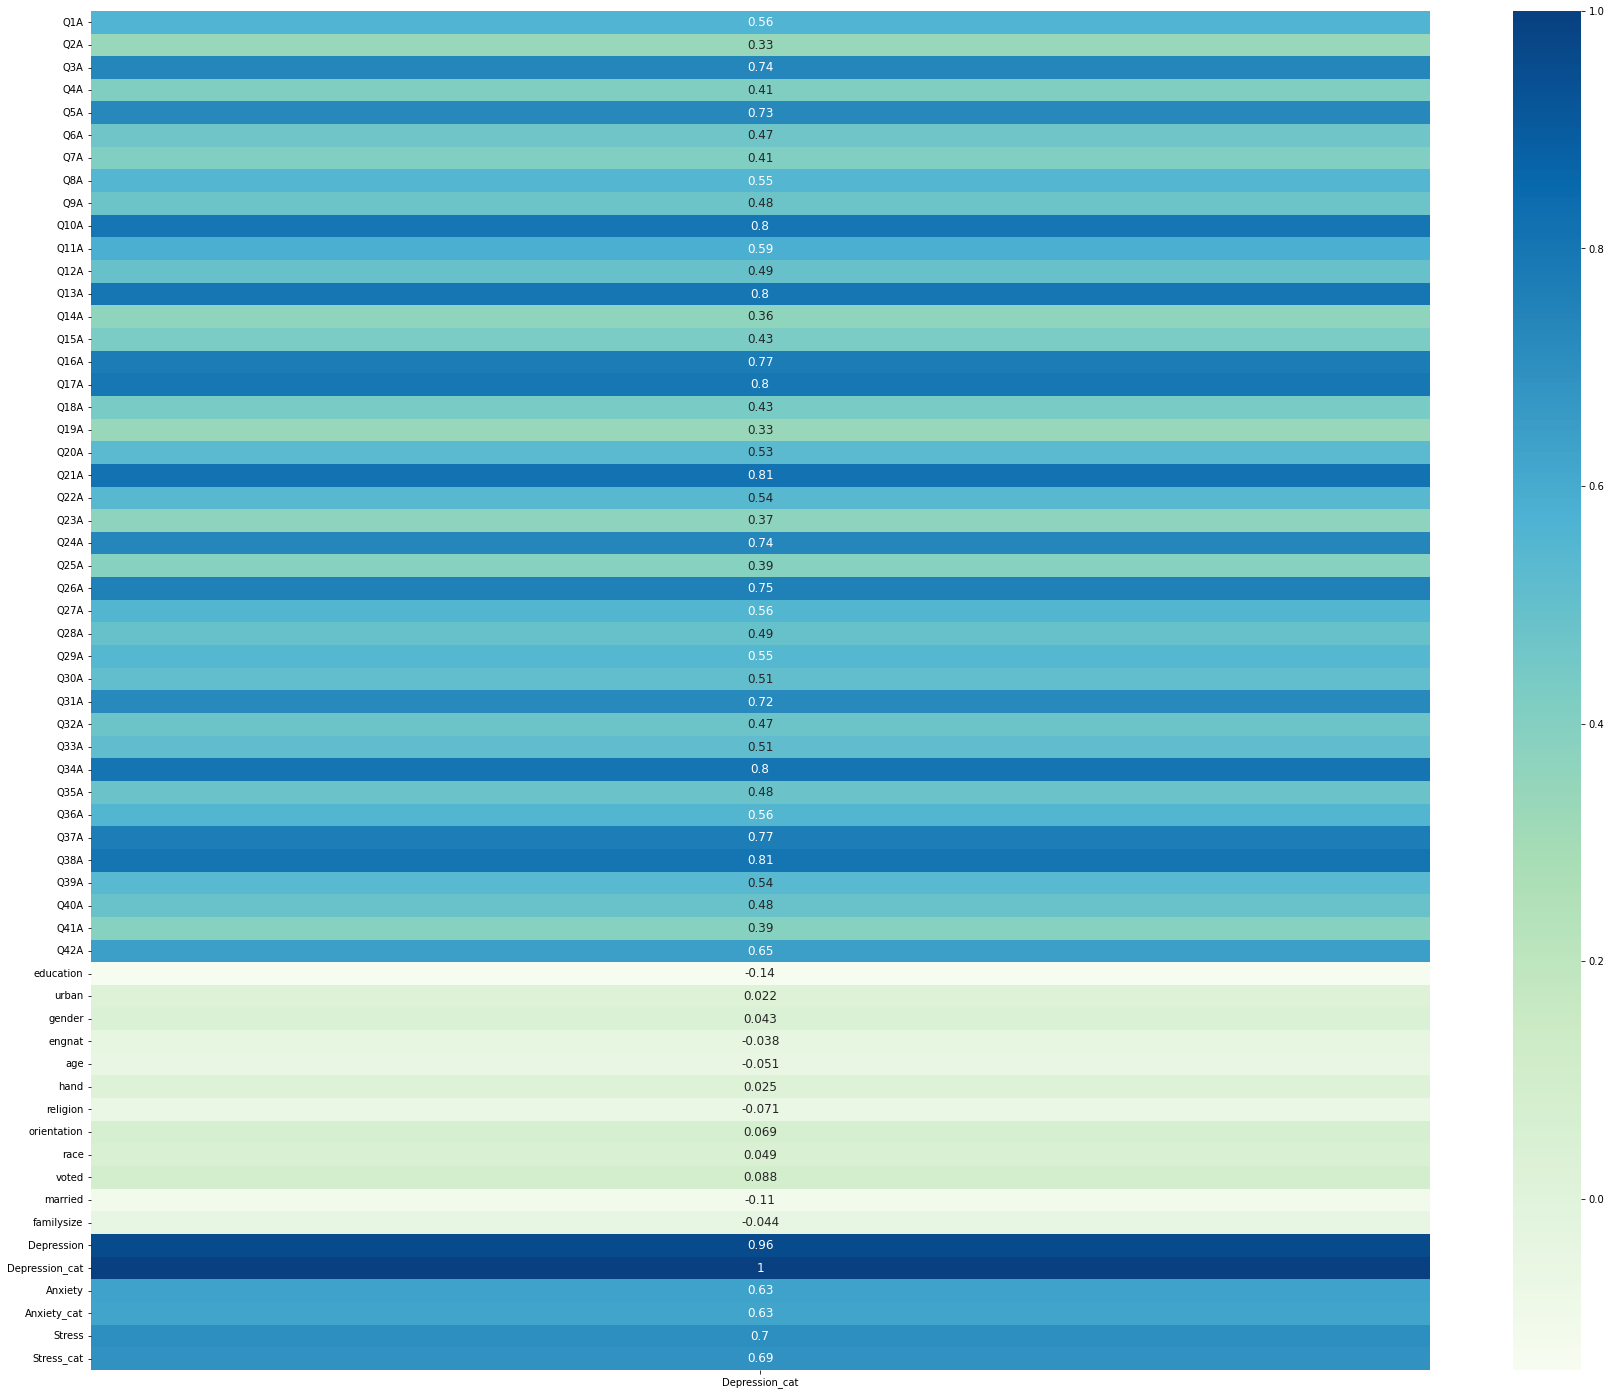

In [13]:
df_corr_interest = df[df.columns[0:63]].corr()['Depression_cat'][:-1]
#set fig size
fig, ax = plt.subplots(figsize=(30,25))
#plot matrix
sns.heatmap(df_corr_interest.to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show();

In [14]:
#scaler=MinMaxScaler()
scaler=StandardScaler()
X=df[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'education', 'urban', 'gender', 'engnat',
        'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'age']]
y=df[['Depression_cat']]
#X = df.drop([['Anxiety','Anxiety_cat']])
#y = df['Anxiety_cat']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42,stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
#RanFor=RandomForestClassifier(n_estimators=500,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto',random_state=42).fit(X_train_scaled,y_train)
RanFor=RandomForestClassifier(n_estimators=200,min_samples_split=3,min_samples_leaf=1,criterion='gini').fit(X_train_scaled,y_train)
y_pred=RanFor.predict(X_test_scaled)
Acc_ran=round(accuracy_score(y_test,y_pred),3)
f1_ran=round(f1_score(y_test,y_pred,average='weighted'),3)
recall_ran=round(recall_score(y_test,y_pred,average='weighted'),3)
precision_ran=round(precision_score(y_test,y_pred,average='weighted'),3)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=y_pred)
print(classification)

Cross Validation Score: 0.929
              precision    recall  f1-score   support

           0     0.9432    0.9771    0.9599      3096
           1     0.8642    0.7309    0.7920      1323
           2     0.8786    0.9148    0.8963      2476
           3     0.8876    0.8856    0.8866      2264
           4     0.9745    0.9737    0.9741      4749

    accuracy                         0.9265     13908
   macro avg     0.9096    0.8964    0.9018     13908
weighted avg     0.9258    0.9265    0.9255     13908



In [16]:
#DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
DT=DecisionTreeClassifier(criterion='gini',random_state=42).fit(X_train_scaled,y_train)
y_pred_dt=DT.predict(X_test_scaled)
Acc_dt=round(accuracy_score(y_test,y_pred_dt),3)
f1_dt=round(f1_score(y_test,y_pred_dt,average='weighted'),3)
recall_dt=round(recall_score(y_test,y_pred_dt,average='weighted'),3)
precision_dt=round(precision_score(y_test,y_pred_dt,average='weighted'),3)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=y_pred_dt)
print(classification)

Cross Validation Score: 0.796
              precision    recall  f1-score   support

           0     0.9025    0.9121    0.9073      3096
           1     0.5597    0.5525    0.5561      1323
           2     0.7033    0.6902    0.6967      2476
           3     0.6674    0.6780    0.6727      2264
           4     0.9226    0.9215    0.9220      4749

    accuracy                         0.8035     13908
   macro avg     0.7511    0.7509    0.7510     13908
weighted avg     0.8030    0.8035    0.8032     13908



In [24]:
#lr=LogisticRegression(solver='newton-cg').fit(X_train_scaled,y_train)
lr=LogisticRegression().fit(X_train_scaled,y_train)
Acc_lr=round(accuracy_score(y_test,lr.predict(X_test_scaled)),3)
f1_lr=round(f1_score(y_test,lr.predict(X_test_scaled),average='weighted'),3)
recall_lr=round(recall_score(y_test,lr.predict(X_test_scaled),average='weighted'),3)
precision_lr=round(precision_score(y_test,lr.predict(X_test_scaled),average='weighted'),3)
print('Cross Validation Score:',round(np.mean(cross_val_score(lr, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=lr.predict(X_test_scaled))
print(classification)

Cross Validation Score: 1.0
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3096
           1     1.0000    1.0000    1.0000      1323
           2     1.0000    1.0000    1.0000      2476
           3     1.0000    1.0000    1.0000      2264
           4     1.0000    1.0000    1.0000      4749

    accuracy                         1.0000     13908
   macro avg     1.0000    1.0000    1.0000     13908
weighted avg     1.0000    1.0000    1.0000     13908



In [18]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)

Cross Validation Score: 0.853
              precision    recall  f1-score   support

           0     0.9933    0.8605    0.9221      3096
           1     0.6431    0.8405    0.7287      1323
           2     0.8659    0.8607    0.8633      2476
           3     0.6712    0.9368    0.7821      2264
           4     0.9969    0.8136    0.8960      4749

    accuracy                         0.8550     13908
   macro avg     0.8341    0.8624    0.8384     13908
weighted avg     0.8861    0.8550    0.8615     13908



In [19]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
Acc_knn=round(accuracy_score(y_test,pred),3)
f1_knn=round(f1_score(y_test,pred,average='weighted'),3)
recall_knn=round(recall_score(y_test,pred,average='weighted'),3)
precision_knn=round(precision_score(y_test,pred,average='weighted'),3)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)

Cross Validation Score: 0.873
              precision    recall  f1-score   support

           0     0.8590    0.9900    0.9199      3096
           1     0.7653    0.4165    0.5394      1323
           2     0.7845    0.9059    0.8409      2476
           3     0.8990    0.7473    0.8162      2264
           4     0.9522    0.9783    0.9651      4749

    accuracy                         0.8770     13908
   macro avg     0.8520    0.8076    0.8163     13908
weighted avg     0.8752    0.8770    0.8682     13908



In [21]:
from sklearn.svm import SVC
svm=SVC().fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)


Cross Validation Score: 0.986
              precision    recall  f1-score   support

           0     0.9942    0.9932    0.9937      3096
           1     0.9727    0.9713    0.9720      1323
           2     0.9823    0.9859    0.9841      2476
           3     0.9797    0.9784    0.9790      2264
           4     0.9945    0.9943    0.9944      4749

    accuracy                         0.9878     13908
   macro avg     0.9847    0.9846    0.9846     13908
weighted avg     0.9878    0.9878    0.9878     13908



In [22]:
Result={
                  'Model':['Random-Forest','Decision-Tree','Logistic-Regression','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[Acc_ran*100,Acc_dt*100,Acc_lr*100,Acc_gb*100,Acc_knn*100,Acc_svm*100],
                  'F1_Score(%)':[f1_ran*100,f1_dt*100,f1_lr*100,f1_gb*100,f1_knn*100,f1_svm*100],
                  'Precision(%)':[precision_ran*100,precision_dt*100,precision_lr*100,precision_gb*100,precision_knn*100,precision_svm*100],
                  'Recall(%)':[recall_ran*100,recall_dt*100,recall_lr*100,recall_gb*100,recall_knn*100,recall_svm*100],
                    }
Result_Depression=pd.DataFrame(Result)

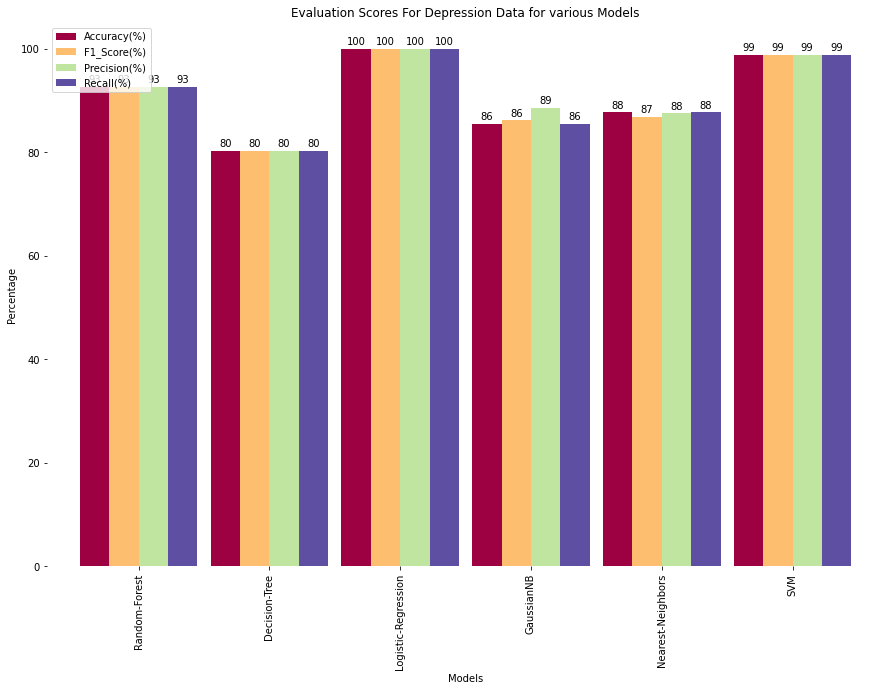

In [23]:
splot=Result_Depression.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Depression Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()